# Supervised Machine Learning: Classification

## Main Objective:

The main objective of this analysis is to predict the chances of heart attack using independent variable from the given dataset.

## Summary:

This "Heart Attack Analysis and Prediction Dataset" is taken from the Kaggle. It has 303 rows and 14 columns. This dataset doesn't contain any null value or categorical variable. Here, the target variable is 'output" which we have to predict using the independent variable. Output variable has two classes (1 and 0). When output is 0 then the chances of heart attack is less and when the output is 1 then there is high chance of heart attack.
        
In this project we will explore the data then visualize the data. After that we will check if there is any null entry, categorical variable, duplicated rows and outliers. After that we will focus on the treatment of these problems and then we train the model. After training we will choose the best training model for the future values prediction. 

## 1. Data Decription:

This dataset contains 4242 entries. It has 303 rows and 14 columns. This dataset not need so much data cleaning because it only contains some outliers and 1 duplicated rows. The further feature description is as follows:

1. Age : Age of the patient
2. Sex : Sex of the patient (1-Male, 0-Female)
3. exang: exercise induced angina (1-yes, 0-no)
4. ca: number of major vessels (0-3)
5. cp : Chest Pain type chest pain type
Value 1: typical angina
Value 2: atypical angina
Value 3: non-anginal pain
Value 4: asymptomatic
6. trtbps : resting blood pressure (in mm Hg)
7. chol : cholestoral
8. fbs : fast blood sugar (1-True, 0-False)
9. rest_ecg : resting electrocardiographic results
Value 0: normal
Value 1: having ST-T wave abnormality
Value 2: showing probable or definite left ventricular hypertrophy by Estes’ criteria
10. thalach: maximum heart rate achieved
11. output: 0 - less chance of heart attack, 1 - more chance of heart attack

In [1]:
# Loading useful libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from scipy import stats

# to ignore the warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Storing dataset in a variable

df = pd.read_csv("heart.csv")

# View top 5 rows of the dataset
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
# bottom 5 rows of the dataset
df.tail()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


## 2. Data Exploration:

In data exploration, we will find total null entries that are avaiable in the dataset and also check
for categorical variables. Here, I will check the shape, description, number of null entries, duplicated rows and
dtypes to know much more about the dataset.

In [4]:
# list the column names of the dataset
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [5]:
# Actual Shape of the dataset

df.shape

(303, 14)

In [6]:
# Checking the null entries

df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [7]:
# Description of the dataset

df.describe(include="all")

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
# Check the categorical variables

df.dtypes

age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output        int64
dtype: object

In [9]:
# Check for duplicate values

duplicated_rows = df[df.duplicated()]
duplicated_rows.shape

(1, 14)

## 3. Data Cleaning:

From the above data exporation, we came to know that this dataset not contain any null entry or categorical variable but it has only 1 duplicated row which we will drop in this data cleaning

In [10]:
# Drop the duplicated values

df = df.drop_duplicates()
df.shape

(302, 14)

## 4. Data Visualization:

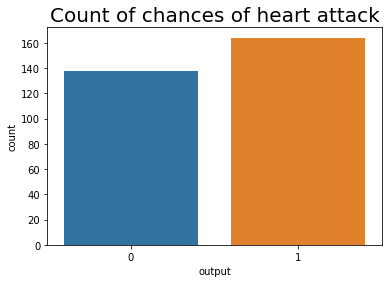

In [11]:
sns.countplot(df.output)
plt.title("Count of chances of heart attack", size=20)
plt.show()

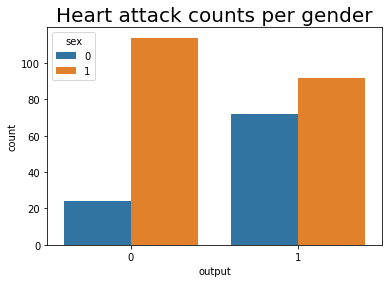

In [12]:
sns.countplot(x='output', hue='sex', data=df)
plt.title("Heart attack counts per gender", size=20)
plt.show()

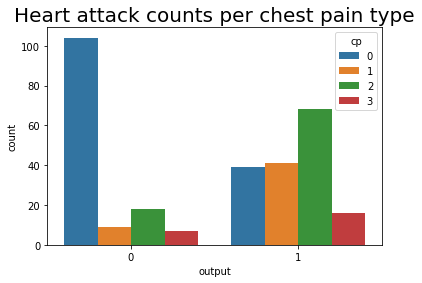

In [13]:
sns.countplot(x='output', hue='cp', data=df)
plt.title("Heart attack counts per chest pain type", size = 20)
plt.show()

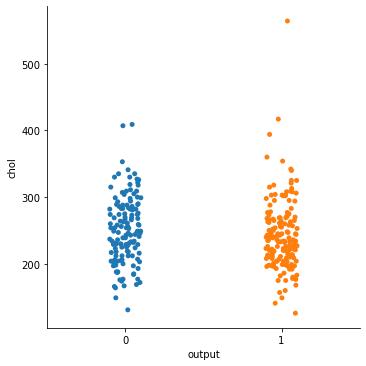

In [14]:
sns.catplot(x='output', y='chol', data=df)
plt.show()

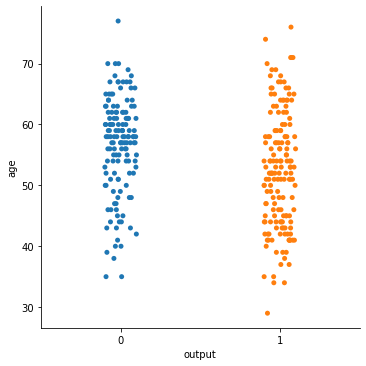

In [15]:
sns.catplot(x='output', y='age', data=df)
plt.show()

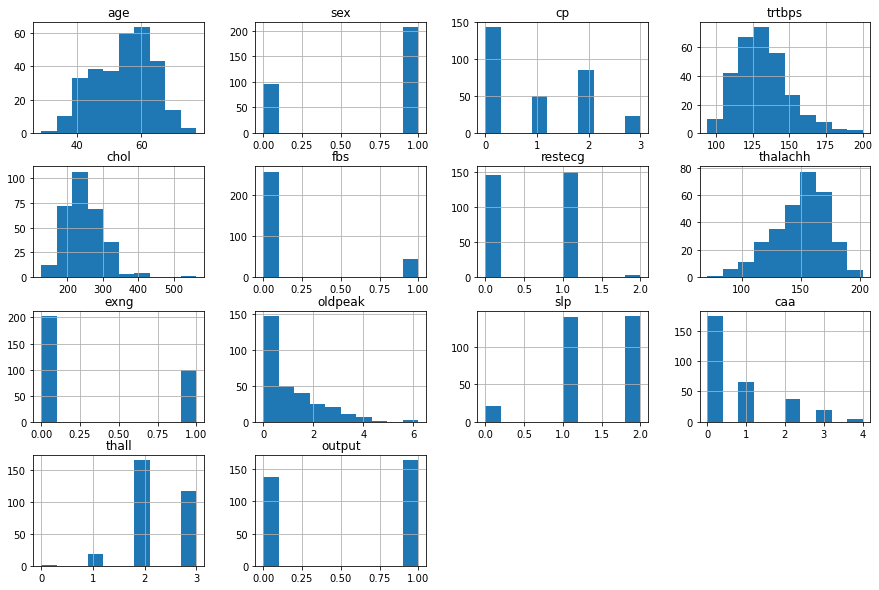

In [16]:
df.hist(figsize = (15,10))
plt.show()

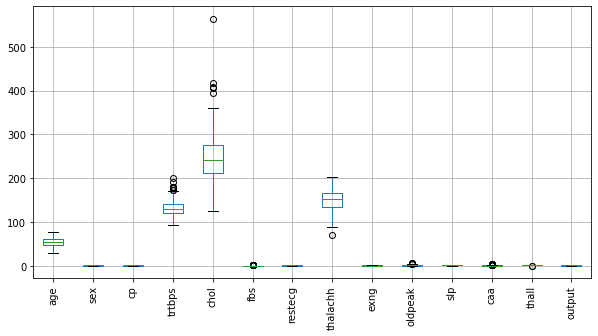

In [17]:
# Detecting the outliers from the dataset
plt.figure(figsize=(10,5))
df.boxplot()
plt.xticks(rotation=90)
plt.show()

## 5. Feature Engineering:

In feature engineering we will perform following tasks:
1. Remove the outliers from the dataset
2. Find the correlation between the variables using Pearson Correlation Method
3. Split the dataset into training and testing using train_test_split

In [18]:
# Removing the outliers using z-score

z_sc = np.abs(stats.zscore(df))
df = df[(z_sc<3).all(axis=1)]
df.shape

(287, 14)

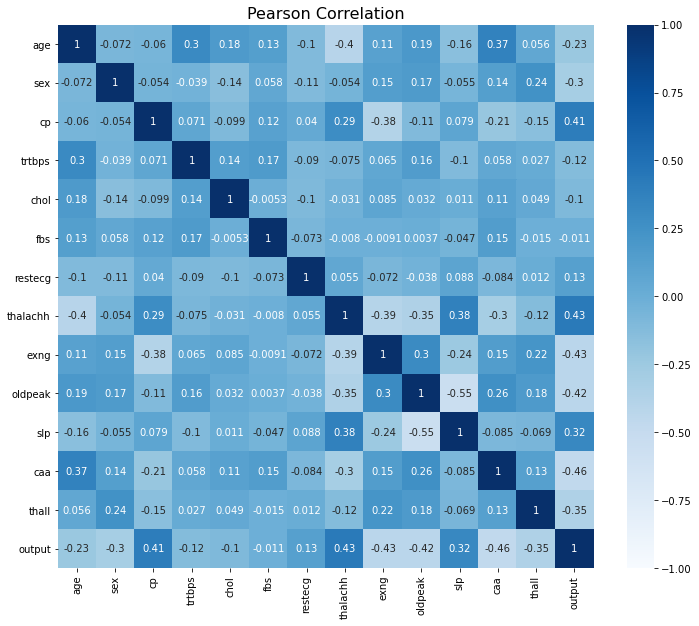

In [19]:
# find the correlation using Pearson method

fig = plt.figure(figsize = (12,10))
corr = df.corr(method = "pearson")
sns.heatmap(corr, vmax = 1, vmin = -1, annot = True, cmap = "Blues")
plt.title("Pearson Correlation", size = 16)
plt.show()

In [20]:
# Create X and y variables for Independent and dependent variables

X = df.drop('output', axis = 1)
y = df.output

In [21]:
# Split the dataset in train and test with 30% test size

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [22]:
# Check the shape of train and test for X and y

X_train.shape, X_train.shape, y_train.shape, y_test.shape

((200, 13), (200, 13), (200,), (87,))

## 6. Model Training:

In model training, we will train the model using Logistic Regression, SVM, Decision Tree and Random Forest with and without GridSearchCV method. After that we will compare the accuracy and f1 score of different model and then choose the best model for the future prediction.

In [23]:
# import score calculations from metrics

from sklearn.metrics import classification_report, f1_score, accuracy_score

In [24]:
# Training the model using Logistic Regression

from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(solver = "liblinear")
LR.fit(X_train, y_train)
y_pred_LR = LR.predict(X_test)

print(classification_report(y_test, y_pred_LR))
print("F1 score: ", f1_score(y_test, y_pred_LR))
LR_acc = round(accuracy_score(y_test, y_pred_LR),2)

              precision    recall  f1-score   support

           0       0.88      0.91      0.89        46
           1       0.90      0.85      0.88        41

    accuracy                           0.89        87
   macro avg       0.89      0.88      0.88        87
weighted avg       0.89      0.89      0.88        87

F1 score:  0.875


In [25]:
# Again training the model using Logistic Regression after dropping the columns with less correlation 

X_train1 = X_train.drop(['trtbps', 'chol', 'fbs', 'restecg'], axis = 1)
X_test1 = X_test.drop(['trtbps', 'chol', 'fbs', 'restecg'], axis = 1)

LR1 = LogisticRegression(solver = 'liblinear')
LR1.fit(X_train1, y_train)
y_pred_LR1 = LR1.predict(X_test1)

print(classification_report(y_test, y_pred_LR1))
print("F1 score: ", f1_score(y_test, y_pred_LR1))
LR1_acc = round(accuracy_score(y_test, y_pred_LR1),2)

              precision    recall  f1-score   support

           0       0.89      0.89      0.89        46
           1       0.88      0.88      0.88        41

    accuracy                           0.89        87
   macro avg       0.88      0.88      0.88        87
weighted avg       0.89      0.89      0.89        87

F1 score:  0.8780487804878049


In [26]:
# Training the model using SVC

from sklearn.svm import SVC
svm = SVC(kernel = 'rbf')
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

print(classification_report(y_test, y_pred_svm))
print("F1 score: ", f1_score(y_test, y_pred_svm))
svm_acc = round(accuracy_score(y_test, y_pred_svm),2)

              precision    recall  f1-score   support

           0       0.81      0.28      0.42        46
           1       0.54      0.93      0.68        41

    accuracy                           0.59        87
   macro avg       0.67      0.60      0.55        87
weighted avg       0.68      0.59      0.54        87

F1 score:  0.6785714285714285


In [27]:
# again training the model using SVC with GridSearchCV

from sklearn.model_selection import GridSearchCV
param_grid = {'kernel':['rbf', 'sigmoid', 'linear'], 'gamma':[0.5, 1, 2, 5], 'C':[0.1, 1, 5]}

svm_GR = GridSearchCV(SVC(), param_grid= param_grid)

svm_GR.fit(X_train, y_train)
y_pred_svm_GR = svm_GR.predict(X_test)

print(svm_GR.best_estimator_)
print(classification_report(y_test, y_pred_svm_GR))
print("F1 score: ", f1_score(y_test, y_pred_svm_GR))
svm_GR_acc = round(accuracy_score(y_test, y_pred_svm_GR),2)

SVC(C=1, gamma=0.5, kernel='linear')
              precision    recall  f1-score   support

           0       0.89      0.91      0.90        46
           1       0.90      0.88      0.89        41

    accuracy                           0.90        87
   macro avg       0.90      0.90      0.90        87
weighted avg       0.90      0.90      0.90        87

F1 score:  0.888888888888889


In [28]:
# training the model using Decision Tree

from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier()
DT.fit(X_train, y_train)
y_pred_DT = DT.predict(X_test)

print(classification_report(y_test, y_pred_DT))
print("F1 score: ", f1_score(y_test, y_pred_DT))
DT_acc = round(accuracy_score(y_test, y_pred_DT),2)

              precision    recall  f1-score   support

           0       0.74      0.74      0.74        46
           1       0.71      0.71      0.71        41

    accuracy                           0.72        87
   macro avg       0.72      0.72      0.72        87
weighted avg       0.72      0.72      0.72        87

F1 score:  0.7073170731707317


In [29]:
# again training the model using Decision Tree with GridSearchCV

param_grid = {'max_depth':range(1, DT.tree_.max_depth+1, 2),
              'max_features': range(1, len(DT.feature_importances_)+1)}

DT_GR = GridSearchCV(DecisionTreeClassifier(), param_grid= param_grid)

DT_GR.fit(X_train, y_train)
y_pred_DT_GR = DT_GR.predict(X_test)

print(DT_GR.best_estimator_)
print(classification_report(y_test, y_pred_DT_GR))
print("F1 score: ", f1_score(y_test, y_pred_DT_GR))
DT_GR_acc = round(accuracy_score(y_test, y_pred_DT_GR),2)

DecisionTreeClassifier(max_depth=3, max_features=6)
              precision    recall  f1-score   support

           0       0.84      0.91      0.87        46
           1       0.89      0.80      0.85        41

    accuracy                           0.86        87
   macro avg       0.87      0.86      0.86        87
weighted avg       0.86      0.86      0.86        87

F1 score:  0.8461538461538461


In [30]:
# training the model using Random Forest from the ensemble methods

from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(oob_score=True, warm_start=True, n_jobs=-1)
RF.fit(X_train, y_train)
y_pred_RF = RF.predict(X_test)

print(classification_report(y_test, y_pred_RF))
print("F1 score: ", f1_score(y_test, y_pred_RF))
RF_acc = round(accuracy_score(y_test, y_pred_RF),2)

              precision    recall  f1-score   support

           0       0.84      0.83      0.84        46
           1       0.81      0.83      0.82        41

    accuracy                           0.83        87
   macro avg       0.83      0.83      0.83        87
weighted avg       0.83      0.83      0.83        87

F1 score:  0.8192771084337348


In [31]:
# again training the model using Random Forest with GridSearchCV

param_grid = {'n_estimators':[1, 10, 20, 50, 100, 200, 500]}

RF_GR = GridSearchCV(RandomForestClassifier(), param_grid= param_grid)
RF_GR.fit(X_train, y_train)
y_pred_RF_GR = RF_GR.predict(X_test)

print(RF_GR.best_estimator_)
print(classification_report(y_test, y_pred_RF_GR))
print("F1 score: ", f1_score(y_test, y_pred_RF_GR))
RF_GR_acc = round(accuracy_score(y_test, y_pred_RF_GR),2)

RandomForestClassifier()
              precision    recall  f1-score   support

           0       0.85      0.87      0.86        46
           1       0.85      0.83      0.84        41

    accuracy                           0.85        87
   macro avg       0.85      0.85      0.85        87
weighted avg       0.85      0.85      0.85        87

F1 score:  0.8395061728395061


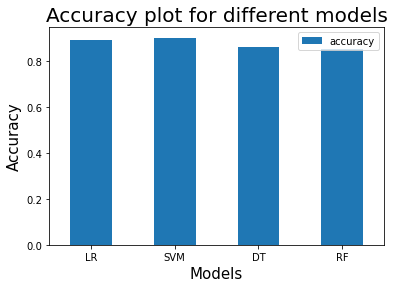

In [32]:
# Plotting the accuracy of all the above trained models using GridSearchCV

acc_df = pd.DataFrame({'label':['LR', 'SVM', 'DT', 'RF'], 'accuracy':[LR1_acc, svm_GR_acc, DT_GR_acc, RF_GR_acc]})
acc_df.plot.bar(x = 'label', y= 'accuracy', rot=0)
plt.title("Accuracy plot for different models", size = 20)
plt.xlabel("Models", size = 15)
plt.ylabel("Accuracy", size = 15)
plt.show()

From the above bar plot, it is clear that the accuracy of SVM and LR model is high as compare to the other models. It is also visible that SVM accuracy is slighly greater than the LR model. So, from the above observation I came to know that the SVM model "with (C=1, gamma=0.5, kernel='linear')" is better for future prediction as compare to the others.

## 7. Key findings:

1. The chances of heart attack increases after the age of 35.
2. When the type of 'cp'(chest pain) is 3 (non-anginal pain) then there is high chance of heart attack.
3. When the sex is 1 i.e. Male then there is high chances of heart attack.

## 8. Conclusion:

From the above observation, we can see that the accuracy of the model is very efficient. So, this model is best for the prediction. But in the case of real life example, if we want to work on this dataset then we need more observations to neglect the chances of error. This is because if we work on small dataset then the model don't have much observations to detect the chances of heart attack. So, to avoid that we can add more observation to this dataset to make it more reliable.